In [1]:
import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scanpy.external as sce

In [2]:
import session_info
session_info.show()

/home/kk837/.conda/envs/generic_env/lib/python3.10/site-packages/session_info/main.py:213: UserWarning: The '__version__' attribute is deprecated and will be removed in MarkupSafe 3.1. Use feature detection, or `importlib.metadata.version("markupsafe")`, instead.
  mod_version = _find_version(mod.__version__)


In [3]:
sc.settings.set_figure_params(dpi=80)

# Read in adata

In [4]:
objects_dir = '/home/kk837/rds/rds-teichlab-C9woKbOCf2Y/kk837/Foetal/anndata_objects/Xenium'
path_adata = f'{objects_dir}/C194-HEA-0-FFPE-1_Hst45-HEA-0-FFPE-1_concat_5K_filtered_raw.h5ad'
adata = sc.read_h5ad(path_adata)
adata

AnnData object with n_obs × n_vars = 362277 × 5001
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'n_counts', 'n_genes', 'tissue_block_id', 'celltypist_coarse', 'conf_score_coarse', 'celltypist_coarse_fin', 'celltypist_coarse2midmod', 'conf_score_coarse2midmod', 'celltypist_mid_fin', 'celltypist_midmod2fine', 'conf_score_midmod2fine', 'pca_harmony_leiden_0.2', 'pca_harmony_leiden_0.3', 'pca_harmony_leiden_0.4', 'pca_harmony_leiden_0.5', 'pca_harmony_leiden_0.8', 'pca_harmony_leiden_1.0', 'pca_harmony_leiden_1.5', 'pca_harmony_leiden_2.0', 'pca_harmony_leiden_

In [5]:
os.getcwd()

'/rfs/project/rfs-iCNyzSAaucw/kk837/notebooks/Foetal/Xenium/5K/C194_Hst45/CamU'

In [6]:
adata.X.data[:5]

array([5., 1., 1., 2., 2.], dtype=float32)

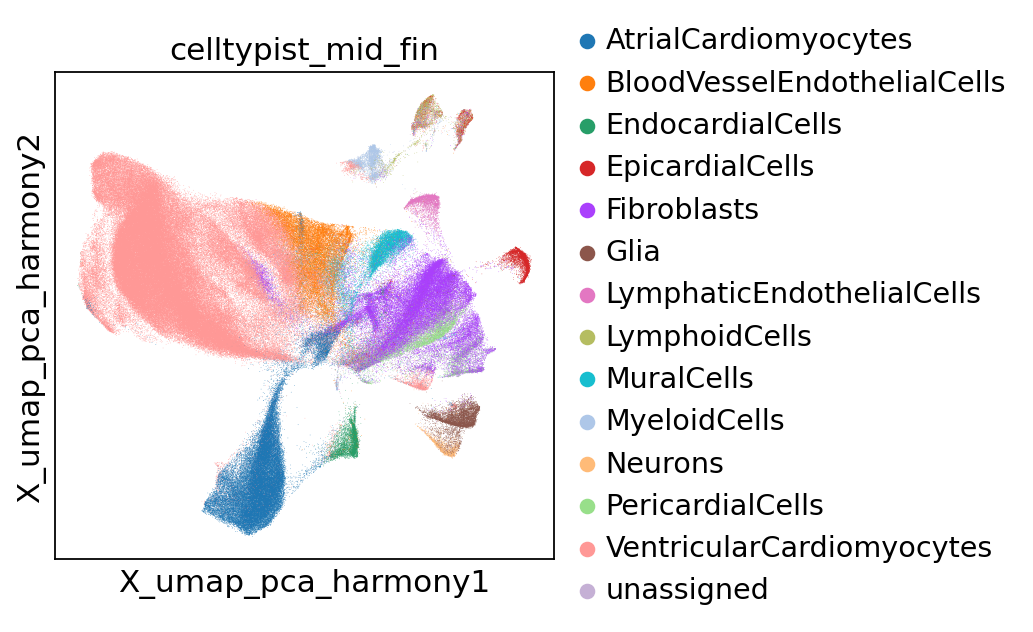

In [7]:
latent_space = 'pca_harmony'
sc.pl.embedding(adata,
                    basis=f"X_umap_{latent_space}",
                    color='celltypist_mid_fin',
                   )

In [8]:
adata.obs['celltypist_mid_fin'].value_counts()

celltypist_mid_fin
VentricularCardiomyocytes      188122
Fibroblasts                     49242
AtrialCardiomyocytes            47076
BloodVesselEndothelialCells     20055
MuralCells                      10986
PericardialCells                 8698
unassigned                       7967
Glia                             6976
EpicardialCells                  5206
EndocardialCells                 5202
MyeloidCells                     3965
LymphaticEndothelialCells        3674
LymphoidCells                    3116
Neurons                          1992
Name: count, dtype: int64

# Add fine-grained annotation

In [9]:
subset_adata_dir = '/home/kk837/rds/rds-teichlab-C9woKbOCf2Y/kk837/Foetal/anndata_objects/Xenium/subsets'
fine_grain_colname = 'fine_grain_12Jun2025'

In [10]:
!ls {subset_adata_dir}

C194-HEA-0-FFPE-1_Hst45-HEA-0-FFPE-1_concat_5K_AtrialCardiomyocytes_lognorm.h5ad
C194-HEA-0-FFPE-1_Hst45-HEA-0-FFPE-1_concat_5K_BloodVesselEndothelialCells_lognorm.h5ad
C194-HEA-0-FFPE-1_Hst45-HEA-0-FFPE-1_concat_5K_EndocardialCells_lognorm.h5ad
C194-HEA-0-FFPE-1_Hst45-HEA-0-FFPE-1_concat_5K_EpicardialCells_lognorm.h5ad
C194-HEA-0-FFPE-1_Hst45-HEA-0-FFPE-1_concat_5K_Fibroblasts_lognorm.h5ad
C194-HEA-0-FFPE-1_Hst45-HEA-0-FFPE-1_concat_5K_Glia_lognorm.h5ad
C194-HEA-0-FFPE-1_Hst45-HEA-0-FFPE-1_concat_5K_LymphaticEndothelialCells_lognorm.h5ad
C194-HEA-0-FFPE-1_Hst45-HEA-0-FFPE-1_concat_5K_LymphoidCells_lognorm.h5ad
C194-HEA-0-FFPE-1_Hst45-HEA-0-FFPE-1_concat_5K_MuralCells_lognorm.h5ad
C194-HEA-0-FFPE-1_Hst45-HEA-0-FFPE-1_concat_5K_MyeloidCells_lognorm.h5ad
C194-HEA-0-FFPE-1_Hst45-HEA-0-FFPE-1_concat_5K_Neurons_lognorm.h5ad
C194-HEA-0-FFPE-1_Hst45-HEA-0-FFPE-1_concat_5K_PericardialCells_lognorm.h5ad
C194-HEA-0-FFPE-1_Hst45-HEA-0-FFPE-1_concat_5K_VentricularCardiomyocytes_lognorm.h5ad


In [11]:
file_list = os.listdir(subset_adata_dir)

filename_head = 'C194-HEA-0-FFPE-1_Hst45-HEA-0-FFPE-1_concat_5K_'
celltypes_to_add = [x.replace(filename_head,'').replace('_lognorm.h5ad','') \
                    for x in file_list if filename_head in x]
celltypes_to_add

['EpicardialCells',
 'PericardialCells',
 'EndocardialCells',
 'LymphaticEndothelialCells',
 'Fibroblasts',
 'AtrialCardiomyocytes',
 'MyeloidCells',
 'Glia',
 'VentricularCardiomyocytes',
 'MuralCells',
 'BloodVesselEndothelialCells',
 'Neurons',
 'LymphoidCells']

In [12]:
adata.obs[fine_grain_colname] =  adata.obs['celltypist_mid_fin'].astype('str').copy()
adata.obs['multi_celltypes_coarse'] = np.nan

In [13]:
for celltype in celltypes_to_add:
    print(celltype)
    if celltype=='LymphaticEndothelialCells':
        print('skip since the label of mid-grain and fine-grain are same')
        continue
    ad = sc.read_h5ad(f'{subset_adata_dir}/C194-HEA-0-FFPE-1_Hst45-HEA-0-FFPE-1_concat_5K_{celltype}_lognorm.h5ad',backed='r')
    print(ad.shape)
    # add cell type labels
    adata.obs.loc[ad.obs_names,fine_grain_colname] = ad.obs['fine_grain_manual']
    # add 'multi_celltypes_coarse'
    adata.obs.loc[ad.obs_names,'multi_celltypes_coarse'] = ad.obs['multi_celltypes_coarse']
adata.obs[fine_grain_colname].value_counts()

EpicardialCells
(5206, 4657)
PericardialCells


/tmp/ipykernel_3225005/343326667.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['No', 'No', 'No', 'No', 'No', ..., 'No', 'No', 'No', 'No', 'No']
Length: 5206
Categories (2, object): ['No', 'Yes']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  adata.obs.loc[ad.obs_names,'multi_celltypes_coarse'] = ad.obs['multi_celltypes_coarse']


(8698, 4737)
EndocardialCells
(5202, 4492)
LymphaticEndothelialCells
skip since the label of mid-grain and fine-grain are same
Fibroblasts
(49242, 4999)
AtrialCardiomyocytes
(47076, 5000)
MyeloidCells
(3965, 4505)
Glia
(6976, 4699)
VentricularCardiomyocytes
(188122, 5001)
MuralCells
(10986, 4771)
BloodVesselEndothelialCells
(20055, 4950)
Neurons
(1992, 4270)
LymphoidCells
(3116, 4614)


fine_grain_12Jun2025
VentricularCardiomyocytes           104353
unassigned                           74123
Fibroblasts                          32842
VentricularCardiomyocytesCycling     30516
unclassified                         13129
                                     ...  
ErythrocytesCycling                     65
EntericLikeNeurons                      45
Megakaryocytes                          42
TCellsCD4pos                            41
DendriticCells                          26
Name: count, Length: 68, dtype: int64

In [14]:
adata.obs['multi_celltypes_coarse'].value_counts()

multi_celltypes_coarse
No     315108
Yes     35528
Name: count, dtype: int64

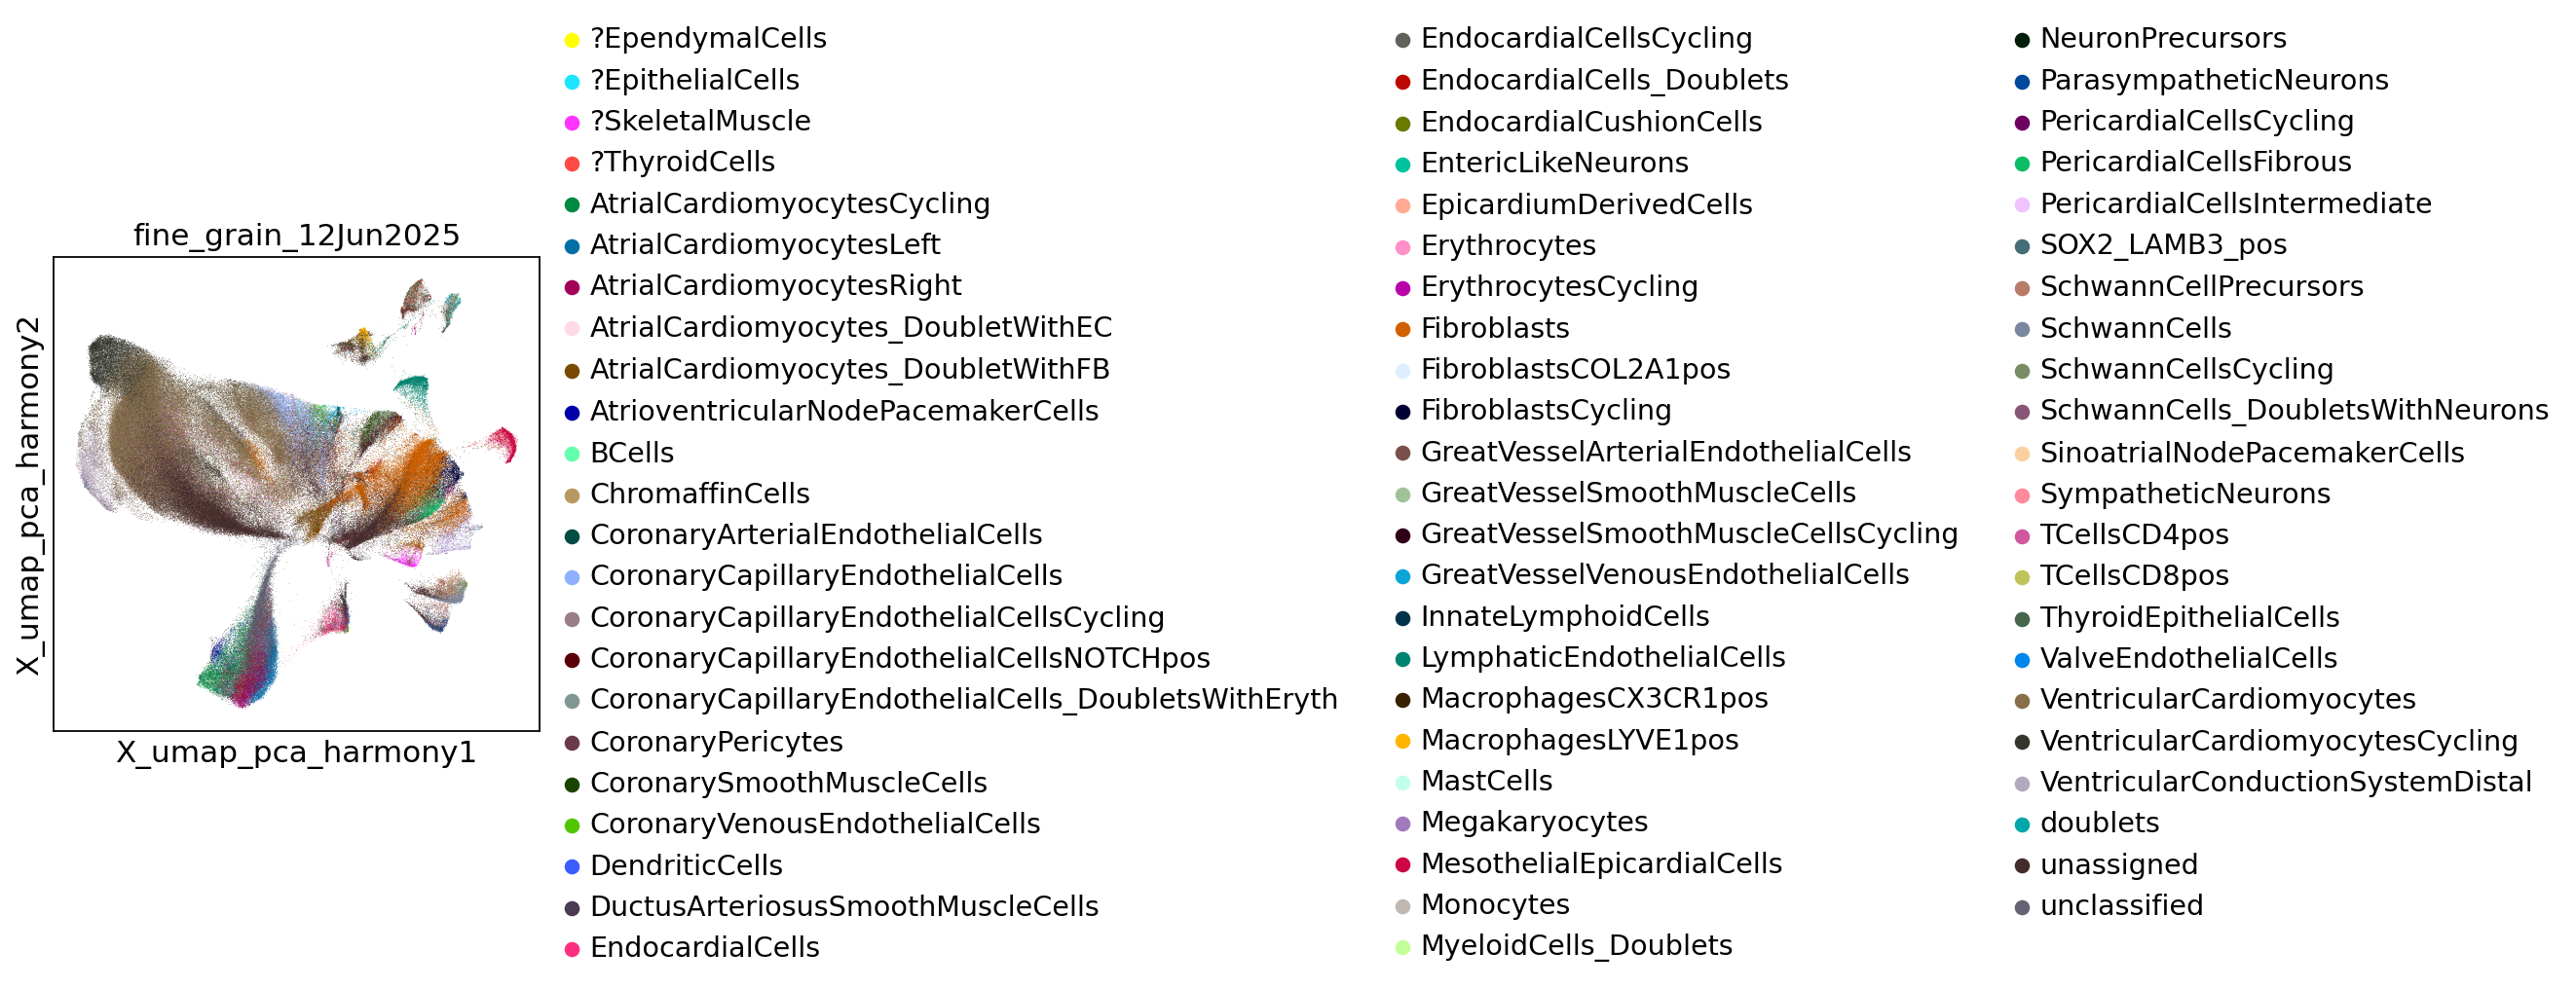

In [15]:
sc.pl.embedding(adata,
                    basis=f"X_umap_{latent_space}",
                    color=fine_grain_colname,
                   )

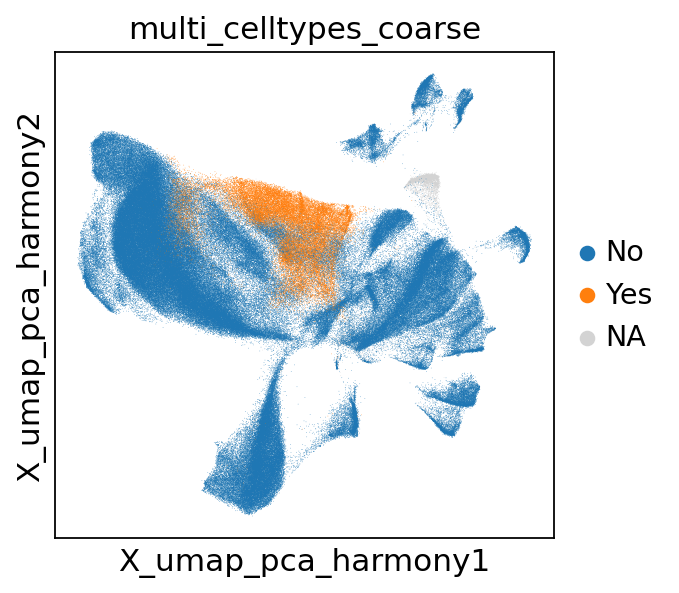

In [16]:
sc.pl.embedding(adata,
                    basis=f"X_umap_{latent_space}",
                    color='multi_celltypes_coarse',
                   )

# Save

In [17]:
adata.write(path_adata)
adata

AnnData object with n_obs × n_vars = 362277 × 5001
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'n_counts', 'n_genes', 'tissue_block_id', 'celltypist_coarse', 'conf_score_coarse', 'celltypist_coarse_fin', 'celltypist_coarse2midmod', 'conf_score_coarse2midmod', 'celltypist_mid_fin', 'celltypist_midmod2fine', 'conf_score_midmod2fine', 'pca_harmony_leiden_0.2', 'pca_harmony_leiden_0.3', 'pca_harmony_leiden_0.4', 'pca_harmony_leiden_0.5', 'pca_harmony_leiden_0.8', 'pca_harmony_leiden_1.0', 'pca_harmony_leiden_1.5', 'pca_harmony_leiden_2.0', 'pca_harmony_leiden_

In [18]:
path_adata

'/home/kk837/rds/rds-teichlab-C9woKbOCf2Y/kk837/Foetal/anndata_objects/Xenium/C194-HEA-0-FFPE-1_Hst45-HEA-0-FFPE-1_concat_5K_filtered_raw.h5ad'

# Output file for XeniumExplorer

In [19]:
for tissue_id in ['C194-HEA-0-FFPE-1', 'Hst45-HEA-0-FFPE-1']:
    slide = adata[adata.obs['tissue_block_id']==tissue_id]
    df = slide.obs[['cell_id',fine_grain_colname]]
    df.columns = ['cell_id','group']
    df.to_csv(f'./{tissue_id}_cellgroup_XR_{fine_grain_colname}.csv',index=False)

# Plotting

In [ ]:
for tissue_id in ['C194-HEA-0-FFPE-1', 'Hst45-HEA-0-FFPE-1']:
    slide = adata[adata.obs['tissue_block_id']==tissue_id]
    sc.pl.spatial(slide,color=[fine_grain_colname],
                  groups=['SinoatrialNodePacemakerCells','AtrioventricularNodePacemakerCells'],
                  spot_size=60,vmax='p100')

In [ ]:
for tissue_id in ['C194-HEA-0-FFPE-1', 'Hst45-HEA-0-FFPE-1']:
    slide = adata[adata.obs['tissue_block_id']==tissue_id]
    sc.pl.spatial(slide,color=[fine_grain_colname],
                  groups=['MacrophagesCX3CR1pos','MacrophagesLYVE1pos'],
                  spot_size=60,vmax='p100')

In [ ]:
for tissue_id in ['C194-HEA-0-FFPE-1', 'Hst45-HEA-0-FFPE-1']:
    slide = adata[adata.obs['tissue_block_id']==tissue_id]
    sc.pl.spatial(slide,color=[fine_grain_colname],
                  groups=['ParasympatheticNeurons','SympatheticNeurons','EntericLikeNeurons'],
                  spot_size=60,vmax='p100')

In [ ]:
for tissue_id in ['C194-HEA-0-FFPE-1', 'Hst45-HEA-0-FFPE-1']:
    slide = adata[adata.obs['tissue_block_id']==tissue_id]
    sc.pl.spatial(slide,color=[fine_grain_colname],
                  groups=['LymphoidCells'],
                  spot_size=60,vmax='p100')

# Cropping

In [ ]:
tissue_id = 'C194-HEA-0-FFPE-1'
slide = adata[adata.obs['tissue_block_id']==tissue_id]
sc.pl.spatial(slide,color=[fine_grain_colname],
              groups=['SinoatrialNodePacemakerCells','AtrioventricularNodePacemakerCells','ParasympatheticNeurons','MacrophagesCX3CR1pos','MacrophagesLYVE1pos'],
              spot_size=20,vmax='p100',
              crop_coord=(4500,7000,4000,6000)
             )

In [ ]:
tissue_id = 'Hst45-HEA-0-FFPE-1'
slide = adata[adata.obs['tissue_block_id']==tissue_id]
sc.pl.spatial(slide,color=[fine_grain_colname],
              groups=['SinoatrialNodePacemakerCells','AtrioventricularNodePacemakerCells','ParasympatheticNeurons','MacrophagesCX3CR1pos','MacrophagesLYVE1pos'],
              spot_size=60,vmax='p100',
              crop_coord=(6000,7000,500,3000)
             )

In [ ]:
tissue_id = 'Hst45-HEA-0-FFPE-1'
slide = adata[adata.obs['tissue_block_id']==tissue_id]
sc.pl.spatial(slide,color=[fine_grain_colname],
              groups=['SinoatrialNodePacemakerCells','ParasympatheticNeurons','TCellsCD8pos','LymphaticEndothelialCells'],
              spot_size=40,vmax='p100',
              crop_coord=(6000,7000,500,3000)
             )